In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
df= pd.read_csv('/Users/mariagarzon/Downloads/breast+cancer+wisconsin+diagnostic/wdbc.data')

In [34]:
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


### From the dataset documentation
    
Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

In [37]:
# Trim dataframe to only contain features a through j as listed above 
df=df.iloc[:,0:12]
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613


In [41]:
# Name the columns
df.columns = ['ID', 'Diagnosis', 'Radius','Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension']
df.head()

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Fractal Dimension
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613


In [39]:
print(df.dtypes)

ID                     int64
Diagnosis             object
Radius               float64
Texture              float64
Perimeter            float64
Area                 float64
Smoothness           float64
Compactness          float64
Concavity            float64
Concave Points       float64
Symmetry             float64
Fractal Dimension    float64
dtype: object


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 568 non-null    int64  
 1   Diagnosis          568 non-null    object 
 2   Radius             568 non-null    float64
 3   Texture            568 non-null    float64
 4   Perimeter          568 non-null    float64
 5   Area               568 non-null    float64
 6   Smoothness         568 non-null    float64
 7   Compactness        568 non-null    float64
 8   Concavity          568 non-null    float64
 9   Concave Points     568 non-null    float64
 10  Symmetry           568 non-null    float64
 11  Fractal Dimension  568 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.4+ KB


In [42]:
# Analyzing the data
num_samples, num_features = df.shape[0], df.shape[1] - 1  # Subtracting 1 to exclude the target column

print(f"The dataset has {num_samples} samples and {num_features} features.")

The dataset has 568 samples and 11 features.


In [43]:
# Split the data into training and testing sets
X = df.drop('Diagnosis',axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
# Train a Decision Tree Classifier using all the features of the data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 87.72%


In [45]:
predictions_clf = clf.predict(X_test)
print(classification_report(y_test,predictions_clf))

              precision    recall  f1-score   support

           B       0.86      0.94      0.90        68
           M       0.90      0.78      0.84        46

    accuracy                           0.88       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.88      0.88       114



### Precision:

For class B: 86% of the instances predicted as class B were actually class B.

For class M: 90% of the instances predicted as class M were actually class M.

### Recall/Sensitivity:

For class B: The model correctly predicted 94% of all actual class B instances.

For class M: The model correctly predicted 78% of all actual class M instances.

### F1-score:
This is the harmonic mean of precision and recall. A perfect f1-score would be 1.0, indicating flawless precision and recall.

For class B: The F1-score is 0.90.

For class M: The F1-score is 0.84.

### Support:

This shows the number of actual occurrences of the class in the test set.
There are 68 instances of class B and 46 instances of class M in the test set, totaling 114 instances.

### Accuracy:
This is the overall correctness of the model, calculated as (number of correct predictions) / (total predictions). 

The model has an accuracy of 88%, which means it made correct predictions for 88% of the instances in the test set.


In summary, the model performs quite well with an accuracy of 88% on the test set. Both classes have high precision, recall, and F1-scores, indicating that the model is balanced and performs well for both classes.

### Use the Grid Search method to run the model for trees of depth 1, 2, 3, 4, 5, and 6 and for the Gini Impurity and Entropy impurity measures

It’s not easy to determine to what depth or number of splits we can develop the tree so that the predictive power can boost. One way to solve this is to try multiple different combinations of them, which is called grid search. There are a list of parameters in the DecisionTreeClassifier() from sklearn. The frequently used ones are max_depth, min_samples_split, and min_impurity_decrease

In [46]:
# Define the parameter grid for the Decision Tree Classifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6]
}

This code uses Grid Search with a 5-fold cross-validation to search for the best combination of parameters for the Decision Tree Classifier among the provided criterion (either 'gini' or 'entropy') and max_depth values (1 through 6). The best model is then evaluated on the test data to get its accuracy.

In [47]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Initialize Grid Search with a 5-fold cross validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3}
Best Cross-Validation Score: 0.9361416361416361


In [48]:
# Evaluate the model on the test data
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")

Test Set Accuracy: 89.47%


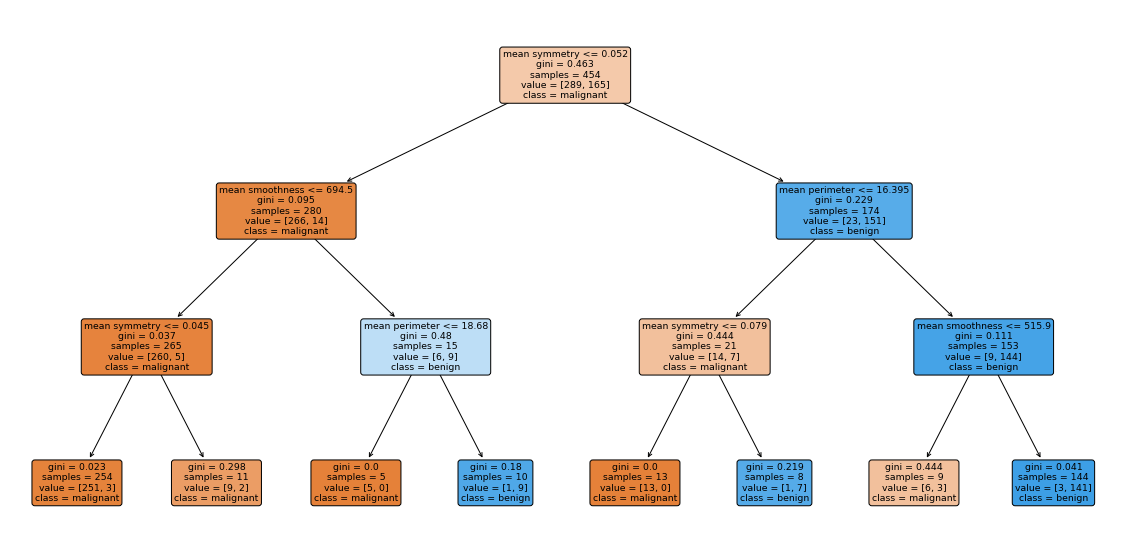

In [49]:
# Visualize the best decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.show()

## Train AdaBoost Model

In [50]:
base_estimator = DecisionTreeClassifier(max_depth=1)  # Using a depth of 1 for the base estimator
clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)  # n_estimators is the number of boosting rounds
clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [53]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost model: {accuracy:.4f}")

Ada_predict=clf.predict(X_test)
print(classification_report(y_test,Ada_predict))

Accuracy of AdaBoost model: 0.9211
              precision    recall  f1-score   support

           B       0.90      0.97      0.94        68
           M       0.95      0.85      0.90        46

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



## Random Forest Classifier

In [55]:
# Initialize the RandomForest classifier
clf = RandomForestClassifier(oob_score = True)

# Train the classifier
clf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [56]:
# Make predictions using the test set
y_pred = clf.predict(X_test)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.92      0.97      0.94        68
           M       0.95      0.87      0.91        46

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [59]:
# Get the set of parameters for each classifier
rf_params = set(RandomForestClassifier().get_params().keys())
dt_params = set(DecisionTreeClassifier().get_params().keys())

# Determine the shared and unique parameters
shared_params = rf_params.intersection(dt_params)
unique_rf_params = rf_params - dt_params
unique_dt_params = dt_params - rf_params

# Print the results
print(f"Shared parameters between RandomForest and DecisionTree ({len(shared_params)}):")
print(sorted(shared_params))
print("\n")

print(f"Parameters unique to RandomForest ({len(unique_rf_params)}):")
print(sorted(unique_rf_params))
print("\n")

print(f"Parameters unique to DecisionTree ({len(unique_dt_params)}):")
print(sorted(unique_dt_params))

Shared parameters between RandomForest and DecisionTree (11):
['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state']


Parameters unique to RandomForest (7):
['bootstrap', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'verbose', 'warm_start']


Parameters unique to DecisionTree (1):
['splitter']


Use the Grid Search method to run the model for trees of depth 1, 2, 3, 4, 5, and 6 and for the
Gini Impurity and Entropy impurity measures.

In [61]:
# Define parameter grid
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
    'oob_score': [True]
}

In [62]:
# Initialize the RandomForest classifier
rf = RandomForestClassifier(n_estimators=100) 

In [63]:
# Initialize GridSearch
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best estimator for predictions or further analysis
best_rf = grid_search.best_estimator_

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'oob_score': True}


In [64]:
# Use the best RandomForest model to make predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the RandomForest model on the test set: {accuracy:.4f}")

Accuracy of the RandomForest model on the test set: 0.9211
